<a href="https://colab.research.google.com/github/abdullah345/Breast-Cancer-Detecion/blob/master/BreastCancerNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Detection

Breast cancer is cancer that forms in the cells of the breasts. After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.

##About NoteBook

This work has been done upon a dataset provided by BIO GPS. This data set contains information of 800+ paitients. I have tried to predict Breast cancer by using machine learning framework. Results have been attached within the notebook. 

If you find anything which i have done wrong or you think it should be done in  different way, i will be very happy if you could mention in issues or you can simply email me at [abdullahamir9@gmail.com](https://)





In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_excel('ER-PR-HR.xlsx')

In [0]:
df = data.copy()

In [0]:
df.head()

,Study ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,ER Status By IHC,Fraction Genome Altered,Person Gender,Neoplasm Histologic Type Name,IHC-HER2,Primary Lymph Node Presentation Assessment Ind-3,Lymph Node(s) Examined Number,Menopause Status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Mutation Count,Oncotree Code,Primary Tumor Site,PR status by ihc
0,brca_tcga_pub2015,70.0,Breast Cancer,Invasive Breast Carcinoma,Positive,0.000802,FEMALE,"Other, specify",Negative,YES,2.0,Post (prior bilateral ovariectomy OR >12 mo si...,Fine needle aspiration biopsy,18.0,BRCA,Left,Negative
1,brca_tcga_pub2015,59.0,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,0.247381,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,3.0,NaN,Core needle biopsy,30.0,IDC,Left,Positive
2,brca_tcga_pub2015,56.0,Breast Cancer,Breast Invasive Lobular Carcinoma,Positive,0.213374,FEMALE,Mixed Histology (please specify),Negative,NaN,8.0,Pre (<6 months since LMP AND no prior bilatera...,Core needle biopsy,20.0,ILC,Left Upper Outer Quadrant,Positive
3,brca_tcga_pub2015,54.0,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,0.201518,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,38.0,IDC,Left,Positive
4,brca_tcga_pub2015,39.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Negative,0.178887,FEMALE,Infiltrating Ductal Carcinoma,Equivocal,NaN,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,78.0,MDLC,Left Upper Inner Quadrant,Positive


In [0]:
df.drop('Study ID', axis=1,inplace=True)

In [0]:
df=df[df['Cancer Type Detailed']!='NaN']

In [0]:
df['Primary Lymph Node Presentation Assessment Ind-3'].dtype== ('O')

True

In [0]:
data.shape,df.shape

((818, 17), (818, 16))

In [0]:
df.drop('Cancer Type', axis=1,inplace=True)

In [0]:
df.head()

,Diagnosis Age,Cancer Type Detailed,ER Status By IHC,Fraction Genome Altered,Person Gender,Neoplasm Histologic Type Name,IHC-HER2,Primary Lymph Node Presentation Assessment Ind-3,Lymph Node(s) Examined Number,Menopause Status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Mutation Count,Oncotree Code,Primary Tumor Site,PR status by ihc
0,70.0,Invasive Breast Carcinoma,Positive,0.000802,FEMALE,"Other, specify",Negative,YES,2.0,Post (prior bilateral ovariectomy OR >12 mo si...,Fine needle aspiration biopsy,18.0,BRCA,Left,Negative
1,59.0,Breast Invasive Ductal Carcinoma,Positive,0.247381,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,3.0,NaN,Core needle biopsy,30.0,IDC,Left,Positive
2,56.0,Breast Invasive Lobular Carcinoma,Positive,0.213374,FEMALE,Mixed Histology (please specify),Negative,NaN,8.0,Pre (<6 months since LMP AND no prior bilatera...,Core needle biopsy,20.0,ILC,Left Upper Outer Quadrant,Positive
3,54.0,Breast Invasive Ductal Carcinoma,Positive,0.201518,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,38.0,IDC,Left,Positive
4,39.0,Breast Mixed Ductal and Lobular Carcinoma,Negative,0.178887,FEMALE,Infiltrating Ductal Carcinoma,Equivocal,NaN,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,78.0,MDLC,Left Upper Inner Quadrant,Positive


In [0]:
import matplotlib.pyplot as plt


In [0]:
df.columns

Index(['Diagnosis Age', 'Cancer Type Detailed', 'ER Status By IHC',
       'Fraction Genome Altered', 'Person Gender',
       'Neoplasm Histologic Type Name', 'IHC-HER2',
       'Primary Lymph Node Presentation Assessment Ind-3',
       'Lymph Node(s) Examined Number', 'Menopause Status',
       'First Pathologic Diagnosis Biospecimen Acquisition Method Type',
       'Mutation Count', 'Oncotree Code', 'Primary Tumor Site',
       'PR status by ihc'],
      dtype='object')

In [0]:
df['AgeCat'] = ''

df.loc[(df['Diagnosis Age']>10) & (df['Diagnosis Age']<=35), 'AgeCat'] = '10-35'
df.loc[(df['Diagnosis Age']>35) & (df['Diagnosis Age']<=45), 'AgeCat'] = '35-45'
df.loc[(df['Diagnosis Age']>45) & (df['Diagnosis Age']<=60), 'AgeCat'] = '45-60'
df.loc[(df['Diagnosis Age']>60) , 'AgeCat'] = '60+'




In [0]:
df.head()

,Diagnosis Age,Cancer Type Detailed,ER Status By IHC,Fraction Genome Altered,Person Gender,Neoplasm Histologic Type Name,IHC-HER2,Primary Lymph Node Presentation Assessment Ind-3,Lymph Node(s) Examined Number,Menopause Status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Mutation Count,Oncotree Code,Primary Tumor Site,PR status by ihc,AgeCat
0,70.0,Invasive Breast Carcinoma,Positive,0.000802,FEMALE,"Other, specify",Negative,YES,2.0,Post (prior bilateral ovariectomy OR >12 mo si...,Fine needle aspiration biopsy,18.0,BRCA,Left,Negative,60+
1,59.0,Breast Invasive Ductal Carcinoma,Positive,0.247381,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,3.0,NaN,Core needle biopsy,30.0,IDC,Left,Positive,45-60
2,56.0,Breast Invasive Lobular Carcinoma,Positive,0.213374,FEMALE,Mixed Histology (please specify),Negative,NaN,8.0,Pre (<6 months since LMP AND no prior bilatera...,Core needle biopsy,20.0,ILC,Left Upper Outer Quadrant,Positive,45-60
3,54.0,Breast Invasive Ductal Carcinoma,Positive,0.201518,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,38.0,IDC,Left,Positive,45-60
4,39.0,Breast Mixed Ductal and Lobular Carcinoma,Negative,0.178887,FEMALE,Infiltrating Ductal Carcinoma,Equivocal,NaN,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,78.0,MDLC,Left Upper Inner Quadrant,Positive,35-45


In [0]:














means=df.mean()

In [0]:
df.fillna(means,inplace=True)

In [0]:
df.isnull().sum()

Diagnosis Age                                                       0
Cancer Type Detailed                                                0
ER Status By IHC                                                   40
Fraction Genome Altered                                             0
Person Gender                                                       0
Neoplasm Histologic Type Name                                       1
IHC-HER2                                                          135
Primary Lymph Node Presentation Assessment Ind-3                  279
Lymph Node(s) Examined Number                                       0
Menopause Status                                                   55
First Pathologic Diagnosis Biospecimen Acquisition Method Type     77
Mutation Count                                                      0
Oncotree Code                                                       0
Primary Tumor Site                                                  1
PR status by ihc    

In [0]:
df['PR status by ihc'].mode()

0    Positive
dtype: object

In [0]:
df['PR status by ihc'].fillna('Positive',inplace=True)


In [0]:
df['Neoplasm Histologic Type Name'].mode()

0    Infiltrating Ductal Carcinoma
dtype: object

In [0]:
df['Neoplasm Histologic Type Name'].fillna('Infiltrating Ductal Carcinoma',inplace=True)

In [0]:
df['ER Status By IHC'].mode()

0    Positive
dtype: object

In [0]:
df['ER Status By IHC'].fillna('Positive',inplace=True)

In [0]:
df['IHC-HER2'].mode()

0    Negative
dtype: object

In [0]:
df['IHC-HER2'].fillna('Negative',inplace=True)

In [0]:
df['Primary Lymph Node Presentation Assessment Ind-3'].mode()

0    YES
dtype: object

In [0]:
df['Primary Lymph Node Presentation Assessment Ind-3'].fillna('YES',inplace=True)

In [0]:
df['Menopause Status'].mode()

0    Post (prior bilateral ovariectomy OR >12 mo si...
dtype: object

In [0]:
df['Menopause Status'].fillna('Post (prior bilateral ovariectomy OR >12 mo si...',inplace=True)

In [0]:
df['First Pathologic Diagnosis Biospecimen Acquisition Method Type'].mode()

0    Core needle biopsy
dtype: object

In [0]:
df['First Pathologic Diagnosis Biospecimen Acquisition Method Type'].fillna('Core needle biopsy',inplace=True)

In [0]:
df['Primary Tumor Site'].mode()

0    Left Upper Outer Quadrant
dtype: object

In [0]:
df['Primary Tumor Site'].fillna('Left Upper Outer Quadrant',inplace=True)

In [0]:
df.isnull().sum()


Diagnosis Age                                                     0
Cancer Type Detailed                                              0
ER Status By IHC                                                  0
Fraction Genome Altered                                           0
Person Gender                                                     0
Neoplasm Histologic Type Name                                     0
IHC-HER2                                                          0
Primary Lymph Node Presentation Assessment Ind-3                  0
Lymph Node(s) Examined Number                                     0
Menopause Status                                                  0
First Pathologic Diagnosis Biospecimen Acquisition Method Type    0
Mutation Count                                                    0
Oncotree Code                                                     0
Primary Tumor Site                                                0
PR status by ihc                                

In [0]:
X = df.drop(['Cancer Type Detailed'],axis=1)

In [0]:
df.dtypes

Diagnosis Age                                                     float64
Cancer Type Detailed                                               object
ER Status By IHC                                                   object
Fraction Genome Altered                                           float64
Person Gender                                                      object
Neoplasm Histologic Type Name                                      object
IHC-HER2                                                           object
Primary Lymph Node Presentation Assessment Ind-3                   object
Lymph Node(s) Examined Number                                     float64
Menopause Status                                                   object
First Pathologic Diagnosis Biospecimen Acquisition Method Type     object
Mutation Count                                                    float64
Oncotree Code                                                      object
Primary Tumor Site                    

In [0]:
Y = df['Cancer Type Detailed']

In [0]:
X.head()

,Diagnosis Age,ER Status By IHC,Fraction Genome Altered,Person Gender,Neoplasm Histologic Type Name,IHC-HER2,Primary Lymph Node Presentation Assessment Ind-3,Lymph Node(s) Examined Number,Menopause Status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Mutation Count,Oncotree Code,Primary Tumor Site,PR status by ihc,AgeCat
0,70.0,Positive,0.000802,FEMALE,"Other, specify",Negative,YES,2.0,Post (prior bilateral ovariectomy OR >12 mo si...,Fine needle aspiration biopsy,18.0,BRCA,Left,Negative,60+
1,59.0,Positive,0.247381,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,3.0,Post (prior bilateral ovariectomy OR >12 mo si...,Core needle biopsy,30.0,IDC,Left,Positive,45-60
2,56.0,Positive,0.213374,FEMALE,Mixed Histology (please specify),Negative,YES,8.0,Pre (<6 months since LMP AND no prior bilatera...,Core needle biopsy,20.0,ILC,Left Upper Outer Quadrant,Positive,45-60
3,54.0,Positive,0.201518,FEMALE,Infiltrating Ductal Carcinoma,Negative,YES,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,38.0,IDC,Left,Positive,45-60
4,39.0,Negative,0.178887,FEMALE,Infiltrating Ductal Carcinoma,Equivocal,YES,2.0,Pre (<6 months since LMP AND no prior bilatera...,Fine needle aspiration biopsy,78.0,MDLC,Left Upper Inner Quadrant,Positive,35-45


In [0]:
X_label = X.drop(['Fraction Genome Altered','Lymph Node(s) Examined Number','Mutation Count'],axis=1)

In [0]:
X_minmax = X[['Fraction Genome Altered','Lymph Node(s) Examined Number','Mutation Count']]

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_minmaxed = pd.DataFrame(scaler.fit_transform(X_minmax),columns=X_minmax.columns)

In [0]:
from sklearn import preprocessing
label = preprocessing.OrdinalEncoder()

In [0]:
X_labeled = pd.DataFrame(label.fit_transform(X_label),columns=X_label.columns)

In [0]:
X_labeled

,Diagnosis Age,ER Status By IHC,Person Gender,Neoplasm Histologic Type Name,IHC-HER2,Primary Lymph Node Presentation Assessment Ind-3,Menopause Status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Oncotree Code,Primary Tumor Site,PR status by ihc,AgeCat
0,44.0,2.0,0.0,7.0,2.0,1.0,3.0,3.0,0.0,0.0,1.0,4.0
1,33.0,2.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0
2,29.0,2.0,0.0,5.0,2.0,1.0,4.0,0.0,2.0,15.0,2.0,3.0
3,27.0,2.0,0.0,1.0,2.0,1.0,4.0,3.0,1.0,0.0,2.0,3.0
4,12.0,1.0,0.0,1.0,0.0,1.0,4.0,3.0,3.0,7.0,2.0,2.0
5,25.0,2.0,0.0,1.0,2.0,1.0,2.0,3.0,1.0,22.0,2.0,3.0
6,12.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0
7,27.0,1.0,0.0,7.0,2.0,1.0,0.0,2.0,0.0,35.0,1.0,3.0
8,51.0,2.0,1.0,1.0,3.0,1.0,2.0,0.0,1.0,0.0,1.0,4.0
9,23.0,2.0,0.0,1.0,3.0,1.0,3.0,0.0,1.0,0.0,2.0,3.0


In [0]:
len(X_labeled['Primary Tumor Site'].unique())
X_labeled['Primary Tumor Site'].unique()

array([ 0., 15.,  7., 22., 35., 36., 27., 26.,  5., 28., 23., 13., 11.,
       41., 16.,  1., 30., 17., 18.,  4., 32., 24., 38.,  6., 29.,  2.,
       12., 33., 25., 14., 31., 10., 34.,  8., 37., 40.,  9., 21.,  3.,
       20., 19., 39.])

In [0]:
for x in range(11):
  num=len(X_labeled.iloc[:,x].unique())
  X_labeled.iloc[:,x].replace(0.0,num,inplace=True)



In [0]:
X_labeled['AgeCat'].unique()
'Lymph Node(s) Examined Number','Mutation Count'

('Lymph Node(s) Examined Number', 'Mutation Count')

In [0]:
X_scaled = X_labeled 
X_scaled[['Fraction Genome Altered','Lymph Node(s) Examined Number','Mutation Count']] = X_minmaxed
X_scaled.head()

,Diagnosis Age,ER Status By IHC,Person Gender,Neoplasm Histologic Type Name,IHC-HER2,Primary Lymph Node Presentation Assessment Ind-3,Menopause Status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Oncotree Code,Primary Tumor Site,PR status by ihc,AgeCat,Fraction Genome Altered,Lymph Node(s) Examined Number,Mutation Count
0,44.0,2.0,2.0,7.0,2.0,1.0,3.0,3.0,4.0,42.0,1.0,4.0,0.000804,0.045455,0.004680
1,33.0,2.0,2.0,1.0,2.0,1.0,2.0,7.0,1.0,42.0,2.0,3.0,0.248103,0.068182,0.007800
2,29.0,2.0,2.0,5.0,2.0,1.0,4.0,7.0,2.0,15.0,2.0,3.0,0.213996,0.181818,0.005200
3,27.0,2.0,2.0,1.0,2.0,1.0,4.0,3.0,1.0,42.0,2.0,3.0,0.202105,0.045455,0.009880
4,12.0,1.0,2.0,1.0,4.0,1.0,4.0,3.0,3.0,7.0,2.0,2.0,0.179408,0.045455,0.020281


#Applying RandomForest

In [0]:
Y.shape, X_scaled.shape

((818,), (818, 15))

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model = RandomForestClassifier(max_depth=3,random_state=25)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled,Y,test_size=0.45,random_state=25)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(449, 15) (449,)
(369, 15) (369,)


In [0]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [0]:
pred = model.predict(xtest)
pred_prb=model.predict_proba(xtest)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy = accuracy_score(ytest,pred)
print("Accuracy of Multi-Class: {}".format(accuracy))

Accuracy of Multi-Class: 0.8265582655826558


In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(ytest,pred))

                                           precision    recall  f1-score   support

         Breast Invasive Ductal Carcinoma       0.81      1.00      0.89       213
        Breast Invasive Lobular Carcinoma       0.89      1.00      0.94        65
Breast Mixed Ductal and Lobular Carcinoma       0.50      0.05      0.09        39
                Invasive Breast Carcinoma       0.89      0.48      0.62        52

                                 accuracy                           0.83       369
                                macro avg       0.77      0.63      0.64       369
                             weighted avg       0.80      0.83      0.78       369



In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(ytest, pred) 

In [0]:
cm_df = pd.DataFrame(cm,
                     index = ['Breast Invasive Ductal Carcinoma','Breast Invasive Lobular Carcinoma','Breast Mixed Ductal and Lobular Carcinoma','Invasive Breast Carcinoma'], 
                     columns = ['Breast Invasive Ductal Carcinoma','Breast Invasive Lobular Carcinoma','Breast Mixed Ductal and Lobular Carcinoma','Invasive Breast Carcinoma'])

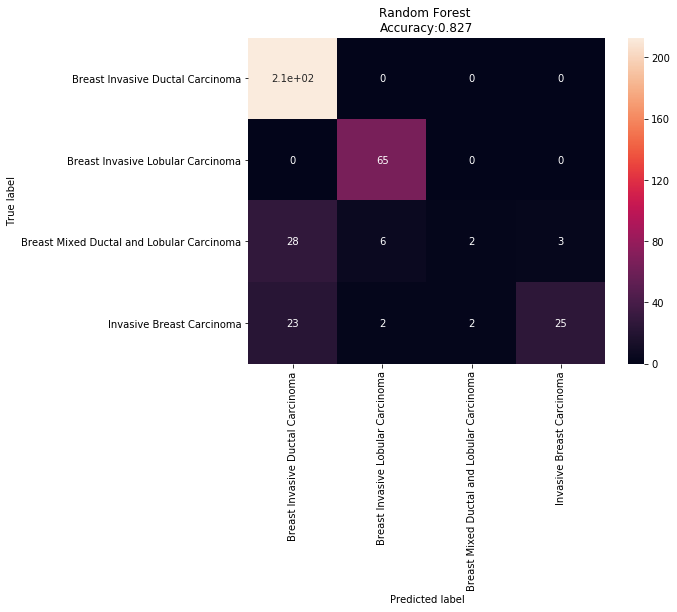

In [0]:

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Applying XGBoost

In [0]:
import xgboost as xgb

In [0]:
model_xgb = xgb.XGBClassifier(max_depth=15, seed=7, random_state=30)

In [0]:

model_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=30,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=7,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_pred_train = model_xgb.predict(xtrain)
xgb_pred_test = model_xgb.predict(xtest)

In [0]:
print(classification_report(ytest,xgb_pred_test))

                                           precision    recall  f1-score   support

         Breast Invasive Ductal Carcinoma       1.00      1.00      1.00       213
        Breast Invasive Lobular Carcinoma       1.00      1.00      1.00        65
Breast Mixed Ductal and Lobular Carcinoma       1.00      1.00      1.00        39
                Invasive Breast Carcinoma       1.00      1.00      1.00        52

                                 accuracy                           1.00       369
                                macro avg       1.00      1.00      1.00       369
                             weighted avg       1.00      1.00      1.00       369



In [0]:
accuracy = accuracy_score(ytest,xgb_pred_test)
print("Accuracy of Multi-Class: {}".format(accuracy))

Accuracy of Multi-Class: 1.0


In [0]:
cm = confusion_matrix(ytest, xgb_pred_test) 

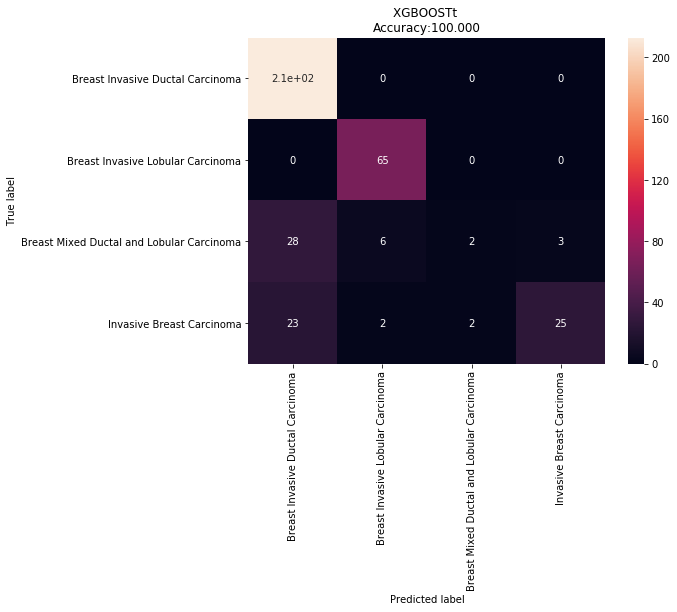

In [0]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('XGBOOSTt \nAccuracy:{0:.3f}'.format(accuracy * 100.0))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Applying KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [0]:
 neigh.fit(X_scaled, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
knn_pred=neigh.predict(xtest)

In [0]:
accuracy = accuracy_score(ytest,knn_pred)
print("Accuracy of Multi-Class: {}".format(accuracy))

Accuracy of Multi-Class: 0.7940379403794038


In [0]:
cm = confusion_matrix(ytest, knn_pred) 

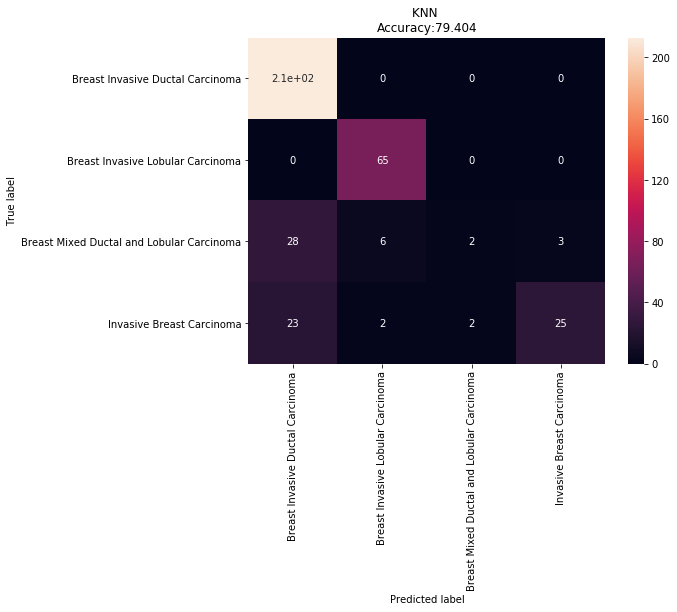

In [0]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy * 100.0))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Applying AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [0]:
clf.fit(X_scaled, Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [0]:
ada_pred=clf.predict(xtest)

In [0]:
accuracy = accuracy_score(ytest,ada_pred)
print("Accuracy of Multi-Class: {}".format(accuracy))

Accuracy of Multi-Class: 0.8943089430894309


In [0]:
cm = confusion_matrix(ytest, ada_pred)

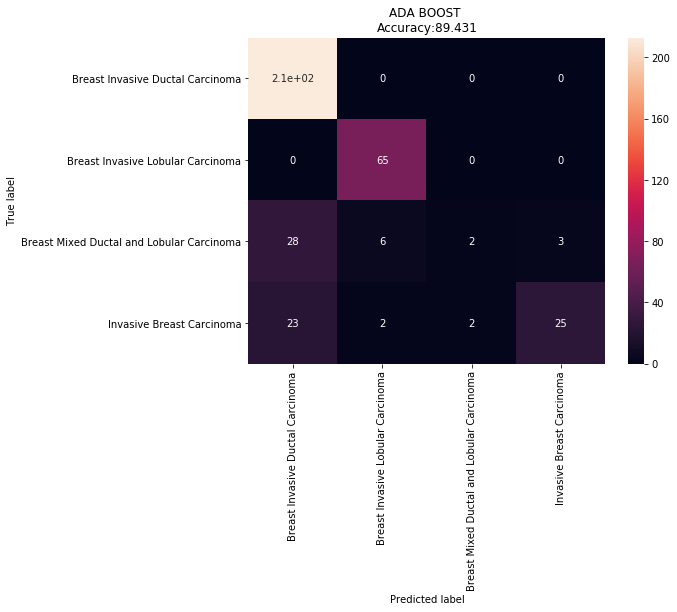

In [0]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('ADA BOOST \nAccuracy:{0:.3f}'.format(accuracy * 100.0))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
print(classification_report(ytest,ada_pred))

                                           precision    recall  f1-score   support

         Breast Invasive Ductal Carcinoma       1.00      1.00      1.00       213
        Breast Invasive Lobular Carcinoma       0.62      1.00      0.77        65
Breast Mixed Ductal and Lobular Carcinoma       0.00      0.00      0.00        39
                Invasive Breast Carcinoma       1.00      1.00      1.00        52

                                 accuracy                           0.89       369
                                macro avg       0.66      0.75      0.69       369
                             weighted avg       0.83      0.89      0.85       369



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#Applying MLP Classifier

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)

In [0]:
clf.fit(X_scaled,Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
ann_pred=clf.predict(xtest)

In [0]:
print(classification_report(ytest,ann_pred))

                                           precision    recall  f1-score   support

         Breast Invasive Ductal Carcinoma       0.58      1.00      0.73       213
        Breast Invasive Lobular Carcinoma       0.00      0.00      0.00        65
Breast Mixed Ductal and Lobular Carcinoma       0.00      0.00      0.00        39
                Invasive Breast Carcinoma       0.00      0.00      0.00        52

                                 accuracy                           0.58       369
                                macro avg       0.14      0.25      0.18       369
                             weighted avg       0.33      0.58      0.42       369



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#Applying SVM

In [0]:
from sklearn import svm

In [0]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')

In [0]:
clf.fit(X_scaled,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm_pred=clf.predict(xtest)

In [0]:
print(classification_report(ytest,svm_pred))

                                           precision    recall  f1-score   support

         Breast Invasive Ductal Carcinoma       0.60      1.00      0.75       213
        Breast Invasive Lobular Carcinoma       0.00      0.00      0.00        65
Breast Mixed Ductal and Lobular Carcinoma       0.00      0.00      0.00        39
                Invasive Breast Carcinoma       1.00      0.31      0.47        52

                                 accuracy                           0.62       369
                                macro avg       0.40      0.33      0.31       369
                             weighted avg       0.49      0.62      0.50       369



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#Applying Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [0]:
clf.fit(X_scaled,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
desc_pred=clf.predict(xtest)

In [0]:
print(classification_report(ytest,desc_pred))

                                           precision    recall  f1-score   support

         Breast Invasive Ductal Carcinoma       1.00      1.00      1.00       213
        Breast Invasive Lobular Carcinoma       1.00      1.00      1.00        65
Breast Mixed Ductal and Lobular Carcinoma       1.00      1.00      1.00        39
                Invasive Breast Carcinoma       1.00      1.00      1.00        52

                                 accuracy                           1.00       369
                                macro avg       1.00      1.00      1.00       369
                             weighted avg       1.00      1.00      1.00       369



In [0]:
cm = confusion_matrix(ytest, desc_pred)

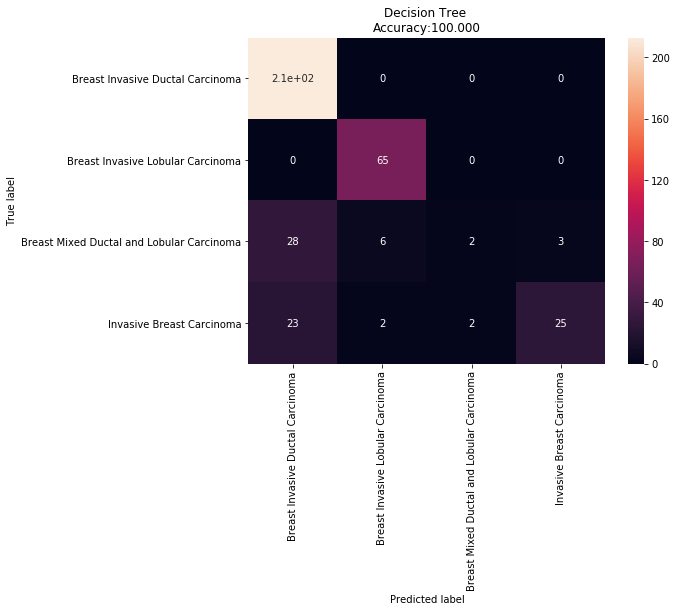

In [0]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(ytest, desc_pred) * 100.0))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()